In [4]:
import sys
sys.path.append('../src/')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import populations
from constants import stellar_dict

In [2]:
df = populations.startrack_v2_mt_1_all() #nrows=100000
pop = populations.Population(df)

NameError: name 'populations' is not defined

In [4]:
# Three different definitions of lmxrb
pop.df['lmxrb'] = np.where((pop.df['mttype'] == 1) &
                            (pop.df['dMmt_b'] > pop.df['dMwind_b']), 1, 0)

pop.df['lmxrb_new'] = np.where((pop.df['mttype'] == 1) &
                            (pop.df['dMmt_b'] > pop.df['dMwind_b']) &
                            (pop.df['T_eff_b'] < 7000), 1, 0)

pop.df['lmxrb_by_mass'] = np.where((pop.df['mttype'] == 1) &
                            (pop.df['dMmt_b'] > pop.df['dMwind_b']) &
                            (pop.df['M_b'] < 5), 1, 0)

pop.df['lmxrb_m_t'] = np.where((pop.df['mttype'] == 1) &
                            (pop.df['dMmt_b'] > pop.df['dMwind_b']) &
                            (pop.df['M_b'] < 5) &
                            (pop.df['T_eff_b'] < 7000), 1, 0)


In [5]:
lmxrb = pop.df[pop.df['lmxrb'] == 1]
lmxrb_t = pop.df[pop.df['lmxrb_new'] == 1]
lmxrb_m = pop.df[pop.df['lmxrb_by_mass'] == 1]
lmxrb_m_t = pop.df[pop.df['lmxrb_m_t'] == 1]


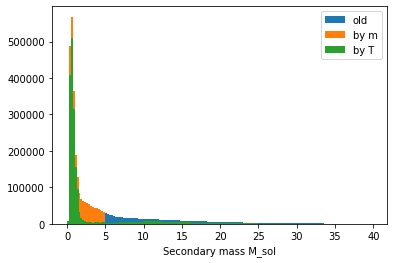

In [6]:
plt.hist(lmxrb['M_b'], bins=np.arange(0,40,0.25), label='old')
plt.hist(lmxrb_m['M_b'], bins=np.arange(0,40,0.25), label='by m')
plt.hist(lmxrb_t['M_b'], bins=np.arange(0,40,0.25), label='by T')
plt.xlabel('Secondary mass M_sol')
plt.legend()

In [7]:
kb_vc = lmxrb['K_b'].value_counts()
kb_vc_t = lmxrb_t['K_b'].value_counts()
kb_vc_m = lmxrb_m['K_b'].value_counts()
kb_vc_m_t = lmxrb_m_t['K_b'].value_counts()


kb = pd.concat([kb_vc, kb_vc_t, kb_vc_m, kb_vc_m_t], axis=1) 
kb.columns = ['lmxrb', 'lmxrb_T', 'lmxrb_M', 'lmxrb_M_T']
kb.index = [stellar_dict[i] for i in kb.index]
kb

,lmxrb,lmxrb_T,lmxrb_M,lmxrb_M_T
MS M < 0.7,22239,22239,22239,22239
MS M > 0.7,197587,29579,84742,29579
Hertzsprung gap star,1369482,486226,1064477,465260
First giant branch star,970884,970884,966033,966033
Core helium burning star,454226,276504,15538,2632
Early asymptotic giant branch star,73070,73070,26349,26349
Thermally pulsing asymptotic giant branch star,5091,5091,4332,4332
Main sequence naked helium star (Wolf-Rayet star),145448,1318,122972,1318
Hertzsprung gap naked helium star,85789,7569,84068,7569
Giant branch naked helium star,53522,53521,53522,53521


In [8]:
stellar_dict

{0: 'MS M < 0.7',
 1: 'MS M > 0.7',
 2: 'Hertzsprung gap star',
 3: 'First giant branch star',
 4: 'Core helium burning star',
 5: 'Early asymptotic giant branch star',
 6: 'Thermally pulsing asymptotic giant branch star',
 7: 'Main sequence naked helium star (Wolf-Rayet star)',
 8: 'Hertzsprung gap naked helium star',
 9: 'Giant branch naked helium star',
 10: 'Helium white dwarf',
 11: 'Carbon/oxygen white dwarf',
 12: 'Oxygen/neon white dwarf',
 13: 'Neutron star',
 14: 'Black hole',
 15: 'Massless Remnant',
 16: 'Hydrogen White Dwarf',
 17: 'Hybrid white dwarf'}

In [9]:
wr = lmxrb_m_t[lmxrb_m_t['K_b'] == 8]
wr

,Unnamed: 0,original_row,t,dt,M_a,M_b,K_a,K_b,a,e,...,P_sup,P_sup_err,P_orb_days,P_sup_days,P_sup_err_days,T_eff_b,lmxrb,lmxrb_new,lmxrb_by_mass,lmxrb_m_t
7350,7350,467704,30.814716,0.00014,8.85,1.14,14,8,370.0,0.0,...,4.979830e+08,2.253317e+06,260.800536,5763.691853,26.080054,6631.050814,1,1,1,1
7351,7351,467705,30.815115,0.00040,8.85,1.13,14,8,380.0,0.0,...,5.185669e+08,2.346456e+06,271.580612,6001.931523,27.158061,6591.462097,1,1,1,1
7352,7352,467707,30.815749,0.00013,8.85,1.12,14,8,380.0,0.0,...,5.188269e+08,2.347633e+06,271.716777,6004.940764,27.171678,6552.574076,1,1,1,1
7353,7353,467708,30.816365,0.00062,8.85,1.11,14,8,390.0,0.0,...,5.397118e+08,2.442135e+06,282.654484,6246.664097,28.265448,6476.819228,1,1,1,1
7354,7354,467710,30.817252,0.00018,8.85,1.10,14,8,400.0,0.0,...,5.608841e+08,2.537937e+06,293.742702,6491.713705,29.374270,6439.913975,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9368720,9368720,228016241,53.937112,0.00180,17.16,1.00,14,8,490.0,0.0,...,5.628995e+08,2.547056e+06,294.798206,6515.040350,29.479821,6607.730206,1,1,1,1
9368721,9368721,228016243,53.939122,0.00012,17.16,0.99,14,8,500.0,0.0,...,5.803785e+08,2.626147e+06,303.952227,6717.344221,30.395223,6570.079015,1,1,1,1
9368722,9368722,228016244,53.941118,0.00200,17.16,0.98,14,8,510.0,0.0,...,5.980414e+08,2.706070e+06,313.202530,6921.775904,31.320253,6496.668007,1,1,1,1
9368723,9368723,228016246,53.943303,0.00013,17.16,0.97,14,8,520.0,0.0,...,6.158866e+08,2.786817e+06,322.548296,7128.317337,32.254830,6460.873420,1,1,1,1


In [10]:
gb = pop.gb_sys(wr)
gb['t'].count().sort_values()

idum_run  iidd_old
-100000   1393740      1
-120000   4962577      1
          5029790      1
          5163048      1
          5273448      1
                      ..
-10000    1095825     18
-40000    3551627     18
-190000   3112931     21
-300000   2305638     21
          3262400     27
Name: t, Length: 1140, dtype: int64

In [11]:
gb = pop.gb_sys(lmxrb)
gb_t = pop.gb_sys(lmxrb_t)
gb_m = pop.gb_sys(lmxrb_m)



0
1
2
3
4
5
6
7
8
9
13


Text(0, 0.5, 'Secondary L (L_sol)')

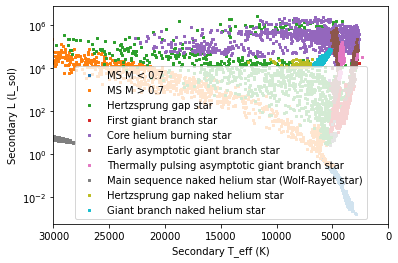

In [12]:
# =============================================================================
# HR diagram
# =============================================================================

for k in np.sort(lmxrb['K_b'].unique()):
    print(k)
    sub = lmxrb[lmxrb['K_b'] == k]
    try:
        sub = sub.sample(1000)
    except(ValueError):
        continue
    # plt.scatter(sub['M_b'], sub['T_eff_b'], label=stellar_dict[k], s=5.0, marker='s')
    plt.xlim(30000, 0)
    if k!=13:
        plt.scatter(sub['T_eff_b'], sub['L_b'], label=stellar_dict[k], s=5.0, marker='s')
plt.yscale('log')
plt.legend(loc='lower center')
plt.xlabel('Secondary T_eff (K)')
plt.ylabel('Secondary L (L_sol)')

0
1
2
3
4
5
6
7
8
9
13


Text(0, 0.5, 'Secondary L (L_sol)')

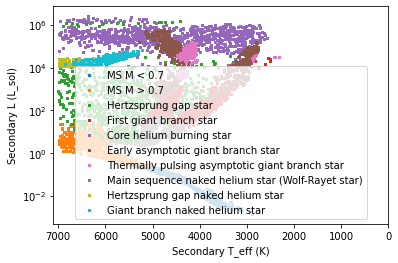

In [13]:
# =============================================================================
# HR diagram
# =============================================================================

for k in np.sort(lmxrb_t['K_b'].unique()):
    print(k)
    sub = lmxrb_t[lmxrb_t['K_b'] == k]
    try:
        sub = sub.sample(1000)
    except(ValueError):
        continue
    # plt.scatter(sub['M_b'], sub['T_eff_b'], label=stellar_dict[k], s=5.0, marker='s')
    plt.xlim(7100, 0)
    if k!=13:
        plt.scatter(sub['T_eff_b'], sub['L_b'], label=stellar_dict[k], s=5.0, marker='s')
plt.yscale('log')
plt.legend(loc='lower center')
plt.xlabel('Secondary T_eff (K)')
plt.ylabel('Secondary L (L_sol)')

0
1
2
3
4
5
6
7
8
9
13


Text(0, 0.5, 'Secondary L (L_sol)')

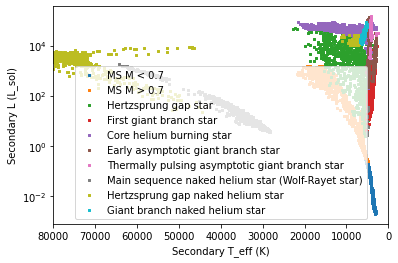

In [14]:
# =============================================================================
# HR diagram
# =============================================================================

for k in np.sort(lmxrb_m['K_b'].unique()):
    print(k)
    sub = lmxrb_m[lmxrb_m['K_b'] == k]
    try:
        sub = sub.sample(1000)
    except(ValueError):
        continue
    # plt.scatter(sub['M_b'], sub['T_eff_b'], label=stellar_dict[k], s=5.0, marker='s')
    plt.xlim(80000, 0)
    if k!=13:
        plt.scatter(sub['T_eff_b'], sub['L_b'], label=stellar_dict[k], s=5.0, marker='s')
plt.yscale('log')
plt.legend(loc='lower center')
plt.xlabel('Secondary T_eff (K)')
plt.ylabel('Secondary L (L_sol)')

In [1]:
df.head()

NameError: name 'df' is not defined

In [6]:
df = populations.startrack_v2_mt_1_all() 
pop = populations.Population(df)

# Filter population
pop.filter_non_bh_ns()
pop.filter_non_thermal_or_nuclear_mt()


In [9]:
df02   = pop.df[pop.df['Z'] == 0.02]
df002  = pop.df[pop.df['Z'] == 0.002]
df0002 = pop.df[pop.df['Z'] == 0.0002]

In [10]:
pop.describe(df02, 'Z=0.02')
pop.describe(df002, 'Z=0.002')
pop.describe(df0002, 'Z=0.0002')
pop.describe(pop.df, 'pop.df')
pop.describe(pop.df_ulx, 'pop.df_ulx')

Information for Z=0.02
N rows: 980171 (100.00%)
N BH rows: 74120 (7.56%)
N NS rows: 906051 (92.44%)
N nuclear mt rows: 289988 (29.59%)
N thermal mt rows: 690183 (70.41%)
N WD mt rows: 0 (0.00%)
N lmxrb rows: 223416 (22.79%)
N b>=1 rows: 742474 (75.75%)
N b<1 rows: 237697 (24.25%)
--------------------------
N binaries: 18867 (100.00%)
N BH binaries: 2689 (14.25%)
N NS binaries: 16186 (85.79%)
N nuclear mt binaries: 4240 (22.47%)
N thermal mt binaries: 16607 (88.02%)
N WD mt binaries: 0 (0.00%)
N lmxrb binaries: 2290 (12.14%)
N b>=1 rows binaries: 17217 (91.25%)
N b<1 binaries: 3447 (18.27%)
--------------------------
Information for Z=0.002
N rows: 3136833 (100.00%)
N BH rows: 2173541 (69.29%)
N NS rows: 963292 (30.71%)
N nuclear mt rows: 1929164 (61.50%)
N thermal mt rows: 1207669 (38.50%)
N WD mt rows: 0 (0.00%)
N lmxrb rows: 713009 (22.73%)
N b>=1 rows: 2333539 (74.39%)
N b<1 rows: 803294 (25.61%)
--------------------------
N binaries: 47743 (100.00%)
N BH binaries: 32011 (67.05%)
N 

In [11]:
ulx02   = pop.df_ulx[pop.df_ulx['Z'] == 0.02]
ulx002  = pop.df_ulx[pop.df_ulx['Z'] == 0.002]
ulx0002 = pop.df_ulx[pop.df_ulx['Z'] == 0.0002]

In [12]:
pop.describe(ulx02, 'ulx Z=0.02')
pop.describe(ulx002, 'ulx Z=0.002')
pop.describe(ulx0002, 'ulx Z=0.0002')

Information for ulx Z=0.02
N rows: 746887 (100.00%)
N BH rows: 71529 (9.58%)
N NS rows: 675358 (90.42%)
N nuclear mt rows: 60586 (8.11%)
N thermal mt rows: 686301 (91.89%)
N WD mt rows: 0 (0.00%)
N lmxrb rows: 32470 (4.35%)
N b>=1 rows: 736995 (98.68%)
N b<1 rows: 9892 (1.32%)
--------------------------
N binaries: 17099 (100.00%)
N BH binaries: 2682 (15.69%)
N NS binaries: 14418 (84.32%)
N nuclear mt binaries: 2237 (13.08%)
N thermal mt binaries: 15908 (93.03%)
N WD mt binaries: 0 (0.00%)
N lmxrb binaries: 1215 (7.11%)
N b>=1 rows binaries: 17095 (99.98%)
N b<1 binaries: 197 (1.15%)
--------------------------
Information for ulx Z=0.002
N rows: 2521423 (100.00%)
N BH rows: 2047410 (81.20%)
N NS rows: 474013 (18.80%)
N nuclear mt rows: 1329720 (52.74%)
N thermal mt rows: 1191703 (47.26%)
N WD mt rows: 0 (0.00%)
N lmxrb rows: 292988 (11.62%)
N b>=1 rows: 2312168 (91.70%)
N b<1 rows: 209255 (8.30%)
--------------------------
N binaries: 43608 (100.00%)
N BH binaries: 31904 (73.16%)
N NS 